In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np

In [3]:
from data_generation.data_generator import generate_synthetic_data

In [4]:
import logging

In [5]:
# Set up logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [6]:

# Generate synthetic data
generated_data = generate_synthetic_data(
    num_users=1000,
    alpha=0.23,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=0,
    base_increase_percentage=0,
)

In [7]:
print(generated_data.head())

   userid country platform user_segment abgroup  age  engagement_score  \
0       1      IN      iOS    Segment_2      a2   24                 8   
1       2      FR  Android    Segment_3      a2   37                 8   
2       3      IN      iOS    Segment_2      a1   26                 5   
3       4      FR  Desktop    Segment_1      a1   40                 4   
4       5      AU      iOS    Segment_3      a2   37                 6   

   pre_test_value   value  
0            2.60  2.6000  
1            3.72  3.0424  
2            2.88  2.3872  
3            3.64  4.3792  
4            3.72  3.5044  


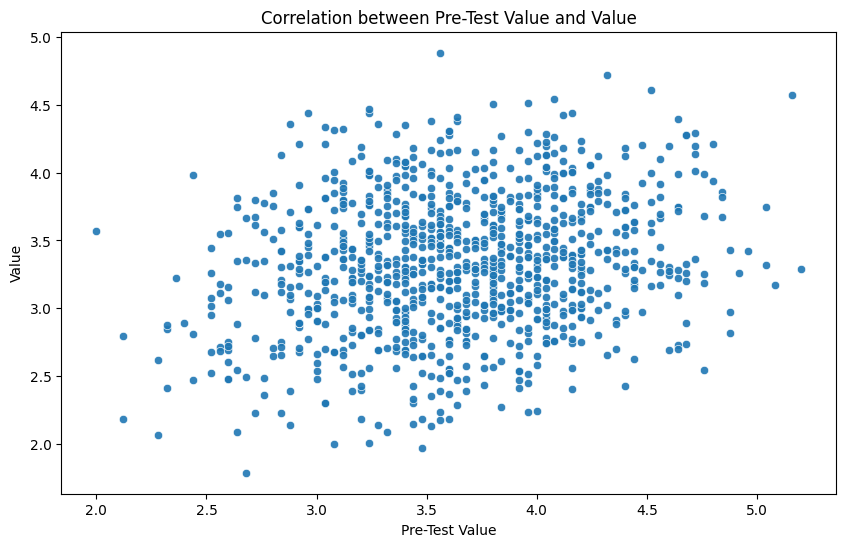

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `generated_data` is your DataFrame
def plot_correlation(df):
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot
    sns.scatterplot(x='pre_test_value', y='value', data=df, alpha=0.9)
    
    # Add title and labels
    plt.title('Correlation between Pre-Test Value and Value')
    plt.xlabel('Pre-Test Value')
    plt.ylabel('Value')
    
    # Show plot
    plt.show()

# Example usage
plot_correlation(generated_data)

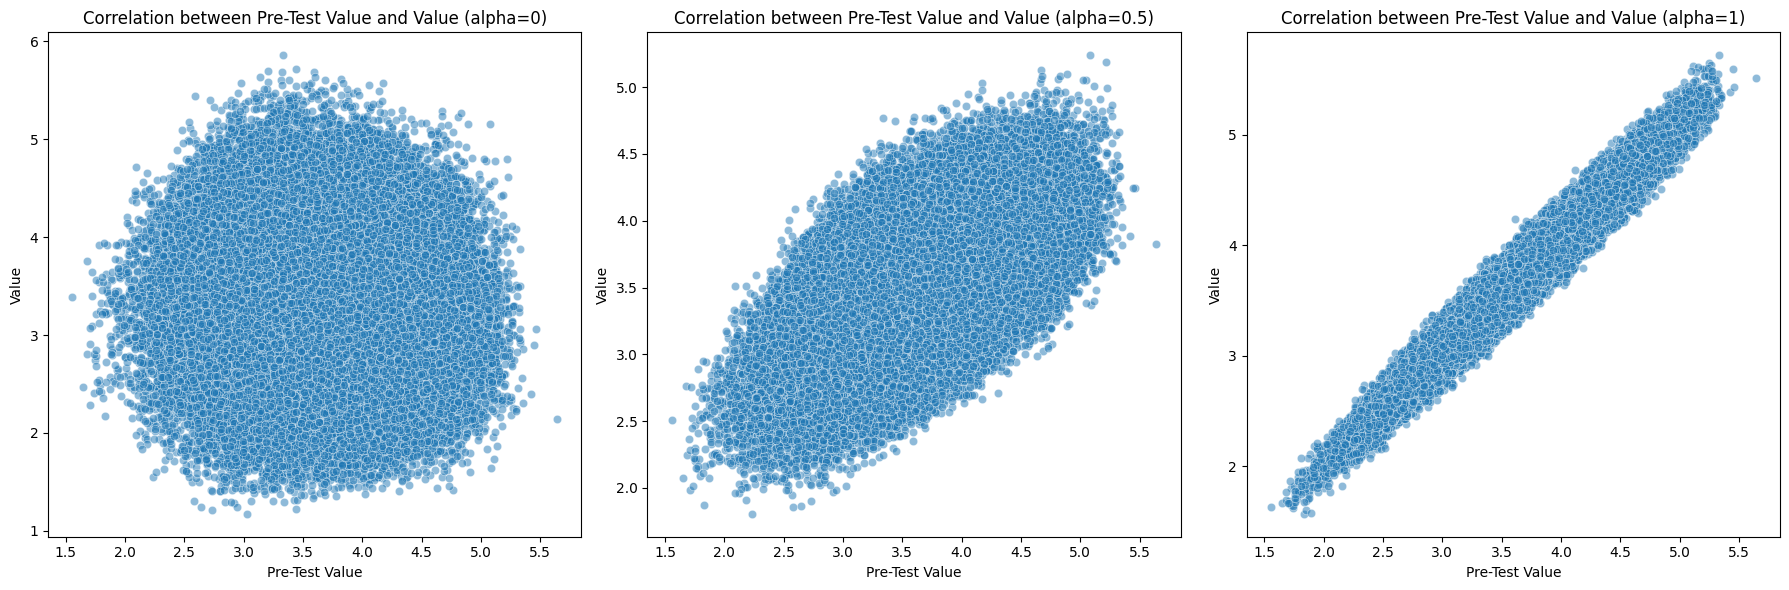

In [72]:
# Generate synthetic data for different alpha values
generated_data_alpha_0 = generate_synthetic_data(
    num_users=100000,
    alpha=0,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=0.1,
    base_increase_percentage=0.04,
)

generated_data_alpha_0_5 = generate_synthetic_data(
    num_users=100000,
    alpha=0.5,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=0.1,
    base_increase_percentage=0.04,
)

generated_data_alpha_1 = generate_synthetic_data(
    num_users=100000,
    alpha=1,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=0.1,
    base_increase_percentage=0.04,
)

# Plotting the graphs in a single row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

def plot_correlation_custom(ax, df, title):
    sns.scatterplot(x='pre_test_value', y='value', data=df, alpha=0.5, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Pre-Test Value')
    ax.set_ylabel('Value')

plot_correlation_custom(ax=axs[0], df=generated_data_alpha_0, title='Correlation between Pre-Test Value and Value (alpha=0)')
plot_correlation_custom(ax=axs[1], df=generated_data_alpha_0_5, title='Correlation between Pre-Test Value and Value (alpha=0.5)')
plot_correlation_custom(ax=axs[2], df=generated_data_alpha_1, title='Correlation between Pre-Test Value and Value (alpha=1)')

plt.tight_layout()
plt.show()

In [73]:
generated_data_alpha_0_5

,userid,country,platform,user_segment,abgroup,age,engagement_score,pre_test_value,value
0,1,IN,iOS,Segment_2,a2,24,8,2.633808,2.611379
1,2,FR,Android,Segment_3,a2,37,8,3.611102,3.400827
2,3,IN,iOS,Segment_2,a1,26,5,2.719771,2.394748
3,4,FR,Desktop,Segment_1,a1,40,4,3.498683,4.093108
4,5,AU,iOS,Segment_3,a2,37,6,3.614906,3.746497
...,...,...,...,...,...,...,...,...,...
99995,99996,IN,Android,Segment_2,a1,57,9,3.819632,3.004393
99996,99997,IN,iOS,Segment_3,b,43,3,2.313472,2.790538
99997,99998,DE,Web,Segment_4,a2,58,2,4.290270,3.534186
99998,99999,CA,Desktop,Segment_3,a2,34,9,4.421396,4.051804


In [74]:
np.corrcoef(generated_data_alpha_0_5['pre_test_value'], generated_data_alpha_0_5['value'])

array([[1.        , 0.59363426],
       [0.59363426, 1.        ]])

In [75]:
df = generated_data_alpha_0

In [76]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe
# df = pd.read_csv('your_data.csv')  # Load your data

# Define features and target
features = ['country', 'platform', 'user_segment', 'abgroup', 'age', 'engagement_score', 'pre_test_value']
target = 'value'  # Replace 'value' with your actual target column name

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create CatBoost Pool
train_pool = Pool(X_train, y_train, cat_features=['country', 'platform', 'user_segment', 'abgroup'])
test_pool = Pool(X_test, cat_features=['country', 'platform', 'user_segment', 'abgroup'])

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=4, loss_function='RMSE')

# Train the model
model.fit(train_pool, eval_set=test_pool, verbose=100, early_stopping_rounds=100)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
r2score = r2_score(y_test, predictions)
print(f'Mean Squared Error: {r2score}')


0:	learn: 0.6481525	total: 12.5ms	remaining: 12.4s
100:	learn: 0.2748933	total: 978ms	remaining: 8.71s
200:	learn: 0.1889551	total: 2.16s	remaining: 8.59s
300:	learn: 0.1622243	total: 3.29s	remaining: 7.65s
400:	learn: 0.1529672	total: 4.33s	remaining: 6.47s
500:	learn: 0.1488508	total: 5.33s	remaining: 5.31s
600:	learn: 0.1462153	total: 6.43s	remaining: 4.27s
700:	learn: 0.1452219	total: 7.44s	remaining: 3.17s
800:	learn: 0.1445712	total: 8.44s	remaining: 2.1s
900:	learn: 0.1440532	total: 9.51s	remaining: 1.04s
999:	learn: 0.1436349	total: 10.6s	remaining: 0us
Mean Squared Error: 0.95641858762656


In [77]:
np.corrcoef(predictions, y_test)


array([[1.        , 0.97801571],
       [0.97801571, 1.        ]])

In [78]:
np.corrcoef(predictions, y_test)


array([[1.        , 0.97801571],
       [0.97801571, 1.        ]])

In [79]:
np.corrcoef(X_test['pre_test_value'], y_test)


array([[ 1.        , -0.04545489],
       [-0.04545489,  1.        ]])